# Problem Statement
The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

You need to identify the best possible model that will give the required performance.


# Objective
1. Explore and visualize the dataset.
2. Build a classification model to predict if the customer is going to churn or not
3. Optimize the model using appropriate techniques
4. Generate a set of insights and recommendations that will help the bank



# Data Dictionary


1. Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
2. Customer_Age: Age in Years
3. Gender: Gender of the account holder
4. Dependent_count: Number of dependents
5. Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
6. Marital_Status: Marital Status of the account holder
7. Income_Category: Annual Income Category of the account holder
Card_Category: Type of Card
8. Months_on_book: Period of relationship with the bank
9. Total_Relationship_Count: Total no. of products held by the customer
10. Months_Inactive_12_mon: No. of months inactive in the last 12 months
11. Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
12. Credit_Limit: Credit Limit on the Credit Card
13. Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
14. Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
15. Total_Trans_Amt: Total Transaction Amount (Last 12 months)
16. Total_Trans_Ct: Total Transaction Count (Last 12 months)
17. Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
18. Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
19. Avg_Utilization_Ratio: Represents how much of the available credit the customer spent



## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.impute import KNNImputer ,SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import KFold ,StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import BaggingClassifier ,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder

import sklearn.metrics as metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    recall_score,
    accuracy_score,
    precision_score,
    f1_score,
)

# To undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To suppress warnings
import warnings
warnings.filterwarnings("ignore")



## Reading Data

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive


In [ ]:
BankChurners=pd.read_csv('BankChurners.csv')

In [ ]:
data=BankChurners.copy()

## Explotary Analysis

In [ ]:
data.shape

(10127, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

We can see that data set conprises of total  10127 records with 21 columns and  Attrition Flag column as Target column. Data has Gender ,Education  Level ,Marital status , Income Category ,Card category as Object  types and rest of the columns /features are of type int or float .
We will explore further but higher level we can see Education Level and Maritial Status column have missing data .

In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,NaN,NaN,NaN,739177606.333663,36903783.450231,708082083.0,713036770.5,717926358.0,773143533.0,828343083.0
Attrition_Flag,10127,2,Existing Customer,8500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Age,10127.0,NaN,NaN,NaN,46.32596,8.016814,26.0,41.0,46.0,52.0,73.0
Gender,10127,2,F,5358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_count,10127.0,NaN,NaN,NaN,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
Education_Level,8608,6,Graduate,3128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,9378,3,Married,4687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income_Category,10127,6,Less than $40K,3561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Card_Category,10127,4,Blue,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_on_book,10127.0,NaN,NaN,NaN,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0




1. We can see that client number is unique number so we can drop it 
2.   Attritition_ Flag is a traget variable with two values and out of 1027 data points 8500 records have  values as Existing Customer	  which means data is imblanceed and while  splitting train test  we will have to starify it and also while model building we will have go for class weight or some balancing technique to handle this imbalance .
3.  Most  of the people in this data set are married  and have educational qualification as Graduate with avrgange depedant  count as 2.
4. 90% of  the  people have cards of Blue category .






In [ ]:
data.duplicated().sum()

0

In [ ]:
data.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 6
Marital_Status                  3
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

Looking at unique records and data summary , there are no duplciates in this data set and following columns  hold cateogorical values .

1.   Attrition_Flag   -- This is target Filed 
2.   Gender 
3.  Education Level 
4.  Marital Status 
5. Income Category
6. Card category 



CLIENTNUM is unique id which we won't need so let us drop it from data set .

In [ ]:
data=data.drop('CLIENTNUM',axis=1)

In [ ]:
data.isnull().sum().sort_values(ascending=False)

Education_Level             1519
Marital_Status               749
Attrition_Flag                 0
Contacts_Count_12_mon          0
Total_Ct_Chng_Q4_Q1            0
Total_Trans_Ct                 0
Total_Trans_Amt                0
Total_Amt_Chng_Q4_Q1           0
Avg_Open_To_Buy                0
Total_Revolving_Bal            0
Credit_Limit                   0
Months_Inactive_12_mon         0
Customer_Age                   0
Total_Relationship_Count       0
Months_on_book                 0
Card_Category                  0
Income_Category                0
Dependent_count                0
Gender                         0
Avg_Utilization_Ratio          0
dtype: int64

We  can see that Data is missing in two columns Education_Level and Marital  Status  . Let us check if there are  any rows where both columns have missing data .

In [ ]:
data['Marital_Status'].value_counts(dropna=False)

Married     4687
Single      3943
NaN          749
Divorced     748
Name: Marital_Status, dtype: int64

In [ ]:
data['Education_Level'].value_counts(dropna=False)

Graduate         3128
High School      2013
NaN              1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

Education_Level   and Marital_Status have missing data . We will check if both are missing in same rows 

In [ ]:
data[(data['Marital_Status'].isnull()) & (data['Education_Level'].isnull())]


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
15,Existing Customer,44,M,4,NaN,NaN,$80K - $120K,Blue,37,5,1,2,4234.0,972,3262.0,1.707,1348,27,1.700,0.230
81,Existing Customer,44,M,1,NaN,NaN,$120K +,Blue,36,6,2,2,34516.0,1533,32983.0,0.924,1603,29,0.526,0.044
211,Existing Customer,59,M,0,NaN,NaN,$80K - $120K,Silver,40,3,2,3,34516.0,1359,33157.0,1.327,1033,26,1.364,0.039
252,Existing Customer,56,M,3,NaN,NaN,$40K - $60K,Blue,46,6,3,4,2910.0,709,2201.0,0.538,1192,27,0.588,0.244
266,Existing Customer,51,F,3,NaN,NaN,Less than $40K,Blue,25,2,2,2,9512.0,1082,8430.0,0.701,1007,22,1.444,0.114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9713,Existing Customer,53,F,1,NaN,NaN,Less than $40K,Blue,43,2,2,2,3629.0,2517,1112.0,0.735,14205,102,0.759,0.694
9772,Existing Customer,30,M,1,NaN,NaN,Less than $40K,Blue,13,1,3,1,3789.0,1782,2007.0,0.850,15670,116,0.785,0.470
9893,Existing Customer,42,F,3,NaN,NaN,abc,Blue,36,6,1,2,15648.0,0,15648.0,0.731,13784,88,0.913,0.000
9894,Existing Customer,28,M,1,NaN,NaN,$40K - $60K,Blue,15,5,2,4,9283.0,2288,6995.0,0.928,13804,110,0.719,0.246


There are total 1519 records with missing data for Education level and tehre 749  records with missing data for Maritail Status  and there are 114 records with both Education Level and MAritial status as missing .

In [ ]:
from sklearn.preprocessing import normalize
data.groupby(['Attrition_Flag','Education_Level'],dropna=False).size()

Attrition_Flag     Education_Level
Attrited Customer  College             154
                   Doctorate            95
                   Graduate            487
                   High School         306
                   Post-Graduate        92
                   Uneducated          237
                   NaN                 256
Existing Customer  College             859
                   Doctorate           356
                   Graduate           2641
                   High School        1707
                   Post-Graduate       424
                   Uneducated         1250
                   NaN                1263
dtype: int64

In [ ]:
data.groupby(['Attrition_Flag','Marital_Status'],dropna=False).size()

Attrition_Flag     Marital_Status
Attrited Customer  Divorced           121
                   Married            709
                   Single             668
                   NaN                129
Existing Customer  Divorced           627
                   Married           3978
                   Single            3275
                   NaN                620
dtype: int64

In [ ]:
data.groupby(['Gender','Marital_Status'],dropna=False).size()

Gender  Marital_Status
F       Divorced           402
        Married           2451
        Single            2125
        NaN                380
M       Divorced           346
        Married           2236
        Single            1818
        NaN                369
dtype: int64

In [ ]:
data.groupby(['Gender','Education_Level'],dropna=False).size()

Gender  Education_Level
F       College             532
        Doctorate           257
        Graduate           1670
        High School        1028
        Post-Graduate       263
        Uneducated          796
        NaN                 812
M       College             481
        Doctorate           194
        Graduate           1458
        High School         985
        Post-Graduate       253
        Uneducated          691
        NaN                 707
dtype: int64

We can see that Education Level and Marital status  data is missing for Attried Customer than Existing Customer . Also when  we checked Education Level and Marital Stautus is missing for Male and Female Equally . We can use this information while filling missing values .

In [ ]:
data['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

Attrition_Flag is Target columns . let us replace  Attrited Customer  value with  1 and Existing Customer  value with 0 .

In [ ]:
data['Attrition_Flag']=data['Attrition_Flag'].replace('Attrited Customer',1).replace('Existing Customer',0)

In [ ]:
data['Attrition_Flag'].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

 Let us Find Numberical and categorical column  so that we can use them for further analysis .

In [ ]:
NumericalColumns=list(data.select_dtypes(include=np.number).columns)

In [ ]:
# Let us remove Attriition Flag Column as this is target column.
NumericalColumns.remove('Attrition_Flag')

In [285]:
## To check distribution of data using box plot and histplot  
 # and also detect outliers in our dataset
def checkDistribution(dataframe,columnName):
     plt.figure(figsize=(9,7));
      # To plot Bolxplot and showing Mean value
     plt.subplot(1,2,1)
     plt.title("Boxplot for "+ columnName, fontsize=12)
     sns.boxplot(data=dataframe,x=columnName ,showmeans=True )
     plt.subplot(1,2,2)
     plt.title("Distribution for Variable "+ columnName, fontsize=15)
     sns.histplot(data=dataframe,x=columnName,kde=True ,bins=15)
     plt.axvline(np.mean(dataframe[columnName]), color='green', linestyle='--') # Add mean to the histogram
     plt.text(np.mean(dataframe[columnName])+0.15,30,'Mean = '+str(round(np.mean(dataframe[columnName]),1)),rotation=90, fontsize=12)
     plt.axvline(np.median(dataframe[columnName]), color='red', linestyle='-') # Add median to the histogram
     plt.text(np.median(dataframe[columnName])+0.15,30,'Median = '+str(round(np.median(dataframe[columnName]),1)),rotation=90, fontsize=12)     

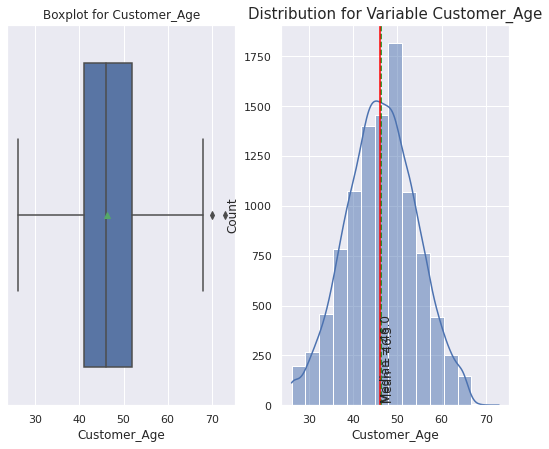

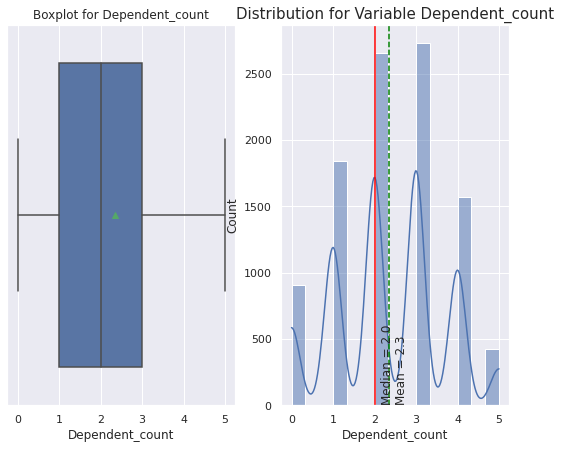

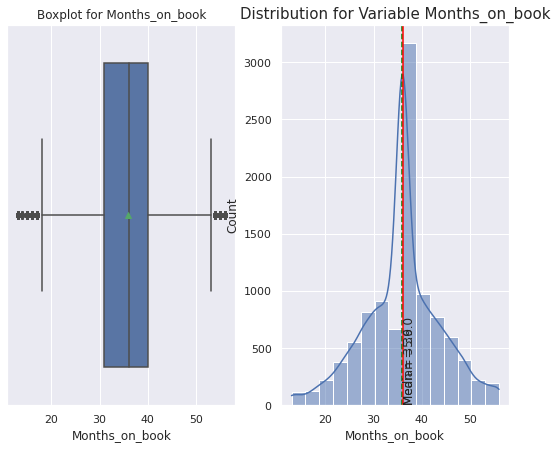

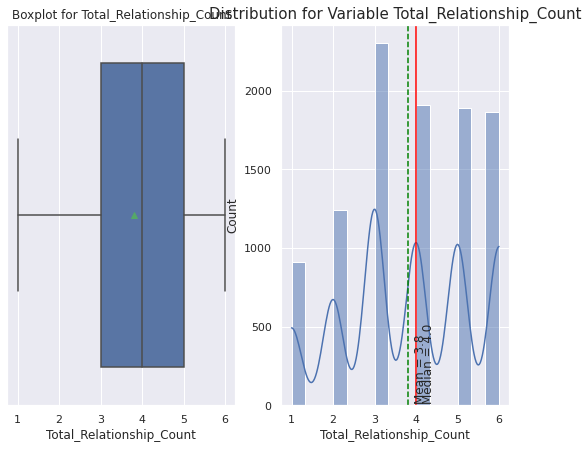

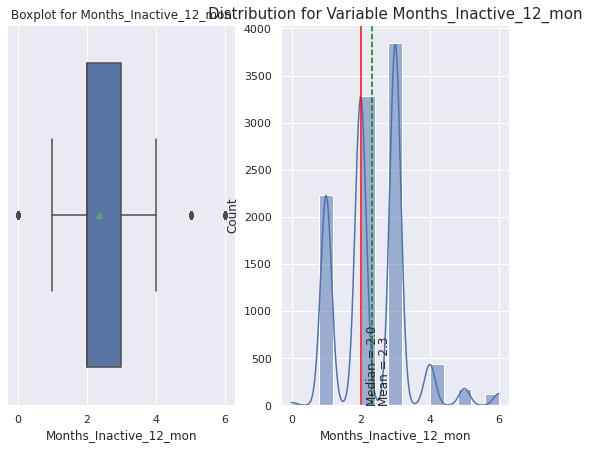

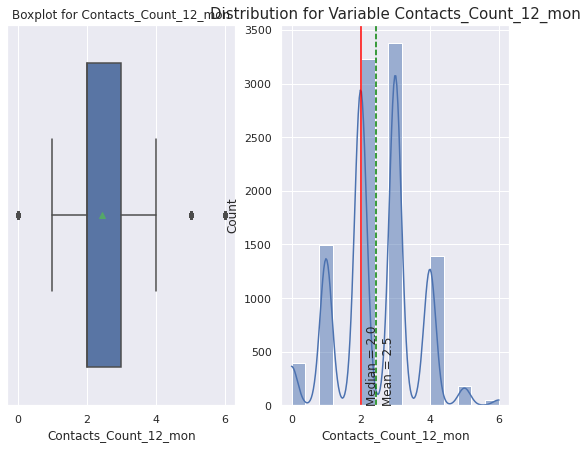

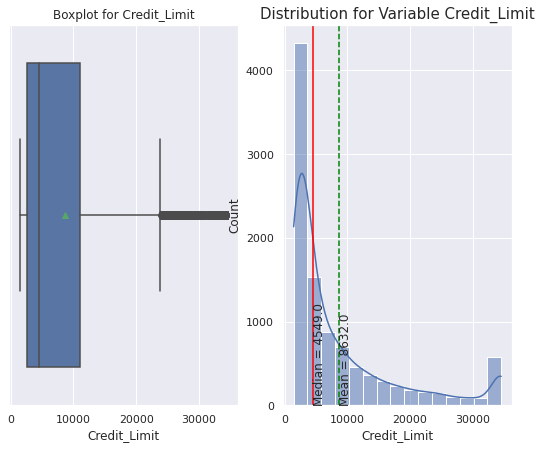

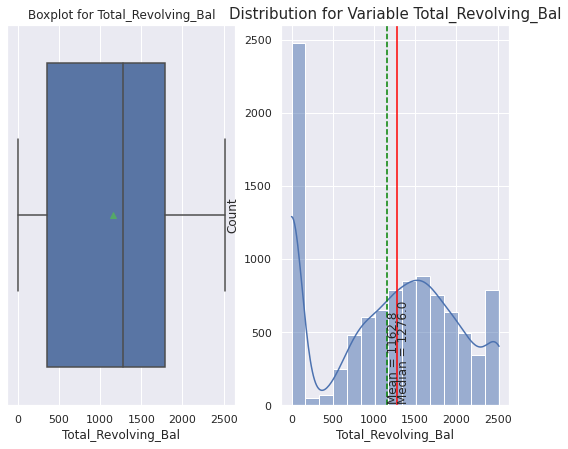

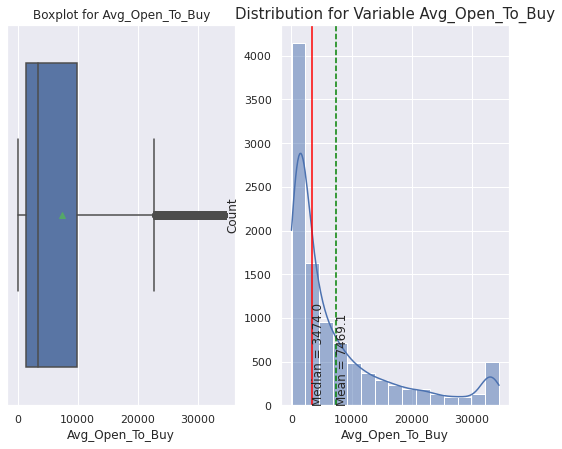

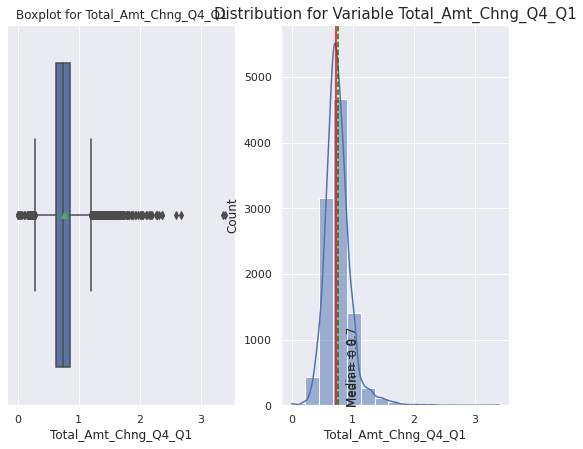

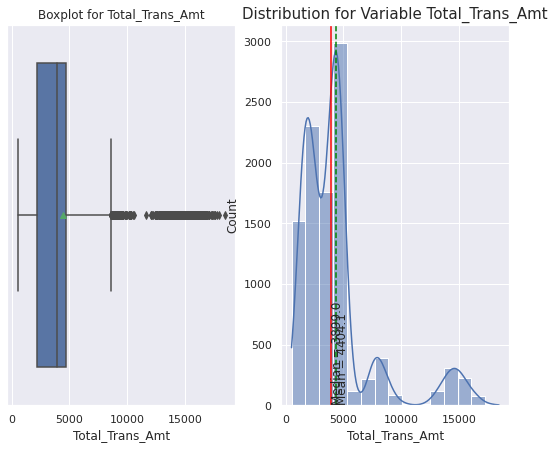

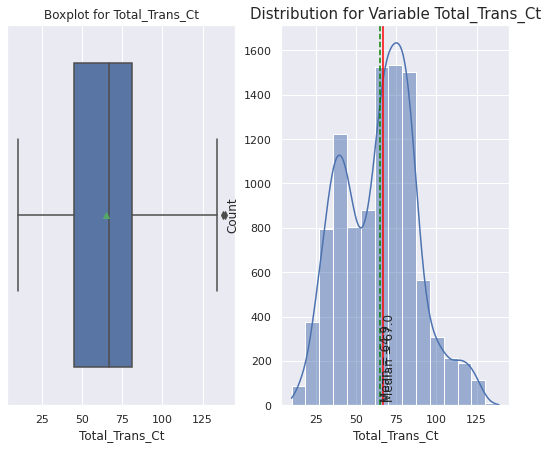

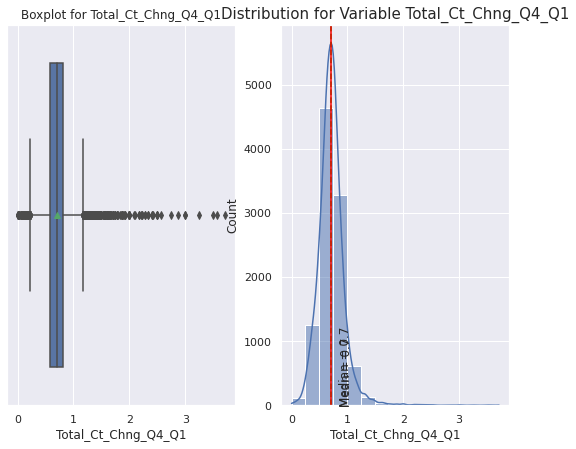

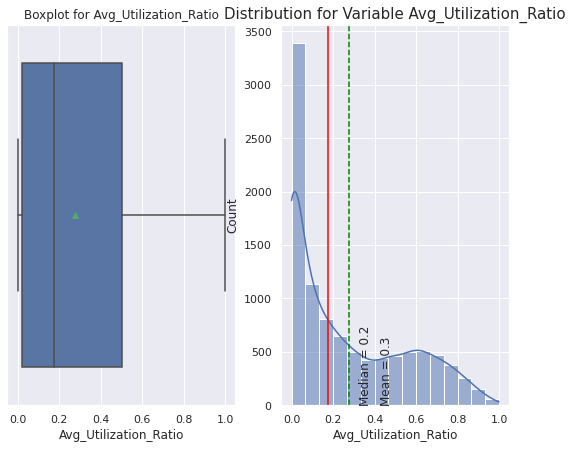

In [286]:
for i in NumericalColumns:
  checkDistribution(data,i)

We can see we have outliers in following columns 
1. Total_Ct_Chng_Q4_Q1
2. Total_Amt_Chng_Q4_Q1
3. Total_Trans_Amt
4. Credit_Limit,
5. Avg_Open_To_Buy,
6. Months_Inactive_12_mon,
7. Contacts_Count_12_mon
8. Months_on_book

Wwe have Right skewed data for  Credit Limit ,Avg Open to Buy ,Avg utilization ratio , distribution of variable trans amount, total trans amount .As we have see we have people with differnt income category and which means different spending  capacity hence we can see outliers  in   Credit_Limit, Total_Ct_Chng_Q4_Q1 ,Total_Amt_Chng_Q4_Q1  and Total_Trans_Amt.Hence eventhough they are outliers but they can be real data  .Based on credit limit spending and spending ratio changes so we might not treat these outliers as we might loose useful insight if we consider these data points as outliers .


In [ ]:
# Let us create list of categorical variables 
CategoricalColumns=list(data.select_dtypes(include=np.object_).columns)


In [ ]:
for i in CategoricalColumns:
   print("-"*100)
   print(i)
   print (data[i].value_counts(dropna=False).sort_values(ascending=False))
   print("-"*100)

----------------------------------------------------------------------------------------------------
Gender
F    5358
M    4769
Name: Gender, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Education_Level
Graduate         3128
High School      2013
NaN              1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Marital_Status
Married     4687
Single      3943
NaN          749
Divorced     748
Name: Marital_Status, dtype: int64
----------------------------------------------------------------------------------------------------
----------------

In [ ]:
## To get distribution of features w.r.t target vairable . It will help in idetifiying if there is any feature which plays  vital 
## role in deciding Attrition Flag value 
def stacked_barplot(data, predictor, target):
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab = pd.crosstab(data[predictor], data[target], normalize="index",dropna=False).sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

----------------------------------------------------------------------------------------------------
Stacked BarPlot for Gender
----------------------------------------------------------------------------------------------------


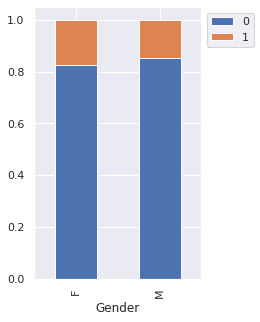

----------------------------------------------------------------------------------------------------
Stacked BarPlot for Education_Level
----------------------------------------------------------------------------------------------------


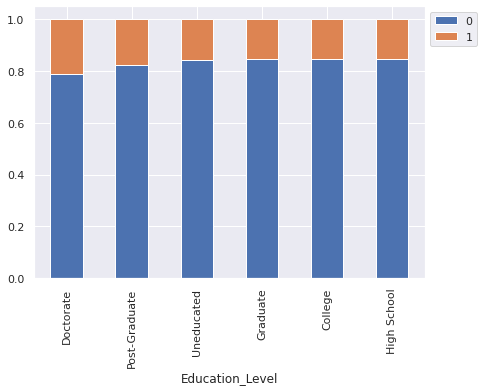

----------------------------------------------------------------------------------------------------
Stacked BarPlot for Marital_Status
----------------------------------------------------------------------------------------------------


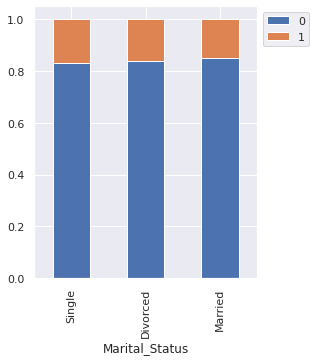

----------------------------------------------------------------------------------------------------
Stacked BarPlot for Income_Category
----------------------------------------------------------------------------------------------------


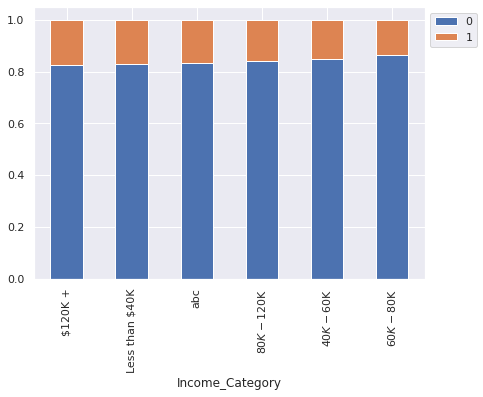

----------------------------------------------------------------------------------------------------
Stacked BarPlot for Card_Category
----------------------------------------------------------------------------------------------------


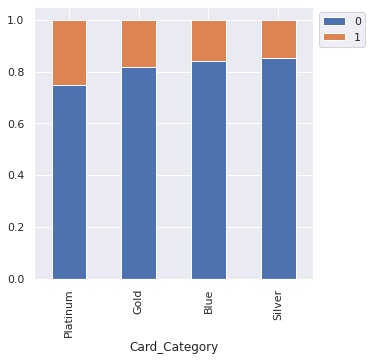

In [ ]:
for i in CategoricalColumns:
    print("-"*100)
    print("Stacked BarPlot for",i)
    print("-"*100)
    stacked_barplot(data, i, 'Attrition_Flag')

Looking at stacked bar plot of all categorical columns we can see that there for all features these is not specific demarcating value which  helps in indetifying Attrition value 0 and 1 which means these feature might not be  that powerful in helping calssify Attrition Flag.We just saw that feature Income Category as one of the category as 'abc' which is strange , let us see if we can idetify it's correct category and correct it . 

In [ ]:
data['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64

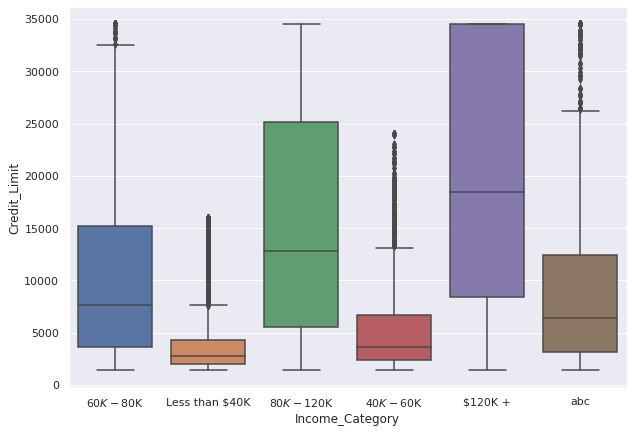

In [ ]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Income_Category", y="Credit_Limit", data=data, orient="vertical")

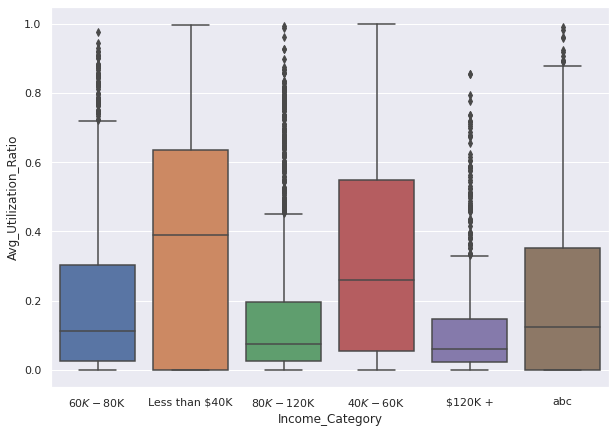

In [ ]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Income_Category", y="Avg_Utilization_Ratio", data=data, orient="vertical")

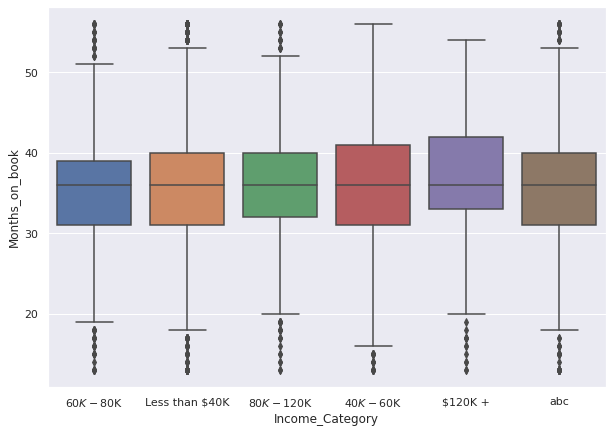

In [ ]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Income_Category", y="Months_on_book", data=data, orient="vertical")

Based on above analysis we can see that abc data behaviour lies somehwhere between 40 k-60k and 60k-80 K category and  behaviour closer to 60k-80k . This range might correspond to 70to 80K range , we will revisit this during feature importance .

In [ ]:
sns.pairplot(data,hue='Attrition_Flag')

Output hidden; open in https://colab.research.google.com to view.

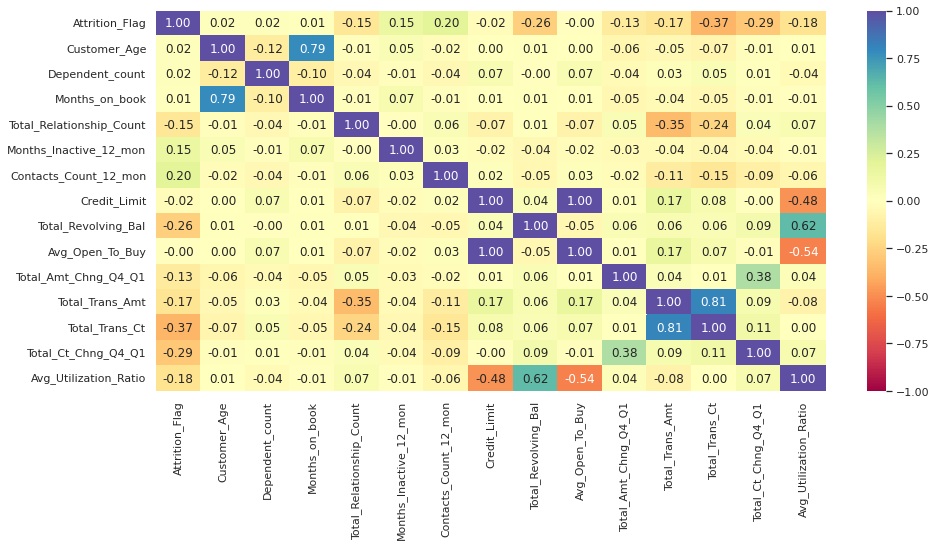

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Looking at pair plot we can observe that none of these field values demarcate/ help is clear calssifying 0 and 1 values of Attrition Falg .

Looking at corelation we cans ee that There is negative co -relation between Avg utilization ratio and Avg Open to Buy which iscorrect as more you spend  there will be less remanining creadit available for spend. 
Total Transaction amount and total transaction count are highly corelated .There is positive co relation between total revoing balance and avg utilization ratio .


In [ ]:
data.groupby(["Attrition_Flag"])[NumericalColumns].mean()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Attrition_Flag,,,,,,,,,,,,,,
0,46.262118,2.335412,35.880588,3.914588,2.273765,2.356353,8726.877518,1256.604118,7470.273400,0.772510,4654.655882,68.672588,0.742434,0.296412
1,46.659496,2.402581,36.178242,3.279656,2.693301,2.972342,8136.039459,672.822987,7463.216472,0.694277,3095.025814,44.933620,0.554386,0.162475


Looking at above distruibition we can observe that people with  High total revolving balance ,total transaction amount , total trnsaaction count and high av utilization ratio have more impact /influence on customer staying with Bank . We can corss check our observation when we develop model and find  important features .

Let us Do Data split between training , testing and validation set  and we will also columns having categorical data to category type .

To DO Missing Value Treatment we want to use Simple  imputer   with most frequent statrgy before  that we will split  data in train , test , val  . Then impute missing values  in training set using fit and transform and in validation and  test data using transform . 
Post iputation we will create dummies .

#  Train, Val , Test Data Split 

In [ ]:
df=data.copy()
#for i in CategoricalColumns:
 # df[i]=df[i].astype('category')


In [ ]:
X = df.drop(["Attrition_Flag"], axis=1)
y = df["Attrition_Flag"]


In [ ]:
X_temp,X_test,y_temp,y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)


In [ ]:
X_train,X_val,y_train,y_val= train_test_split(X_temp,y_temp,random_state=1,test_size=0.20,stratify=y_temp)

In [ ]:
y_train.value_counts(normalize=True)

0    0.83933
1    0.16067
Name: Attrition_Flag, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

0    0.839421
1    0.160579
Name: Attrition_Flag, dtype: float64

In [ ]:
y_val.value_counts(normalize=True)

0    0.83921
1    0.16079
Name: Attrition_Flag, dtype: float64

We can see data is highly imblanced in target column and we will have to handle this imbalance by over or undersampling or  by adding class weights otherwise model will favour class with  more data points.

# Data Preprocessing


We have missing data in two categorical columns so we will use most frequent strategy to impute missing values in Marital Status and Education Level .

In [ ]:
cols_to_impute = ['Marital_Status', 'Education_Level']
imp_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")


# fit and transform the imputer on train data
X_train[cols_to_impute] = imp_mode.fit_transform(X_train[cols_to_impute])

# Transform on validation and test data
X_val[cols_to_impute] = imp_mode.transform(X_val[cols_to_impute])

# fit and transform the imputer on test data
X_test[cols_to_impute] = imp_mode.transform(X_test[cols_to_impute])




Creating Dummies

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(5670, 30) (1418, 30) (3039, 30)


# Model Evaluation Criteria

## What can go wrong
 1.  We can predict customers will stop using credit Card  but in reality they will not .- ( Loss of Resource)
2. We can predict customers  will continue to use credit card  but in reality they could stop using it and leave Bank . ( Loss of opportunity)


## What Case is important 

1.  We want to find the customer who would be leaving the Bank and also we need to find reasons associated with it .
2. Here our pririty is corrctly identify  customer who are going to stop using Bank's credit card service so that Bank can address their issue and can work on retaining /improving their performance with Bank .

## What Matrics to Be optimized 

1. We want to ensure to find potential customer who are going to leave bank/stop using Crdit card  and Bank should target then and address there issues and work on their retaintion as it requires lot of efforts in retaintion we should ensure that we correctly identify such customer and which means our Recall should be high  . So that we can correctly  identify TP and have less FN as Bank is going to put an effort in retaining based on this result . 
2. Also we need to ensure that overall we don't have low precision score ( which means bank  should not put  efforts in pursuing/retaining customer who have no inclination to leave), which in turn means we should also look at F1 score . But our main focus should be on good Recall score .





# Model Buidling
1. We willl  Build 6 models , Logistic regression , Decision Tree , Bagging , 
Random Forest  , Grandient Boosting and Adabost .
2. Looking at data distrubution of Target field , data is highly imbalaced so to treat it we willl try with over and under sampleing .
3. Post that we will  over sample data and again check performance on these size models.
4. Next step we will under sample data and check performance of all these 6 models .
5. After execution , we will choose best  models and Hyper tune them 


In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("LR",LogisticRegression(random_state=1)))
models.append(("DecisionTree", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))


results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

LR: 44.56434276106407
DecisionTree: 78.37506755539543
Bagging: 79.47216717708521
Random forest: 76.95009908124662
GBM: 83.0967393262475
Adaboost: 82.22122140154926

Validation Performance:

LR: 44.29824561403509
DecisionTree: 80.26315789473685
Bagging: 85.08771929824562
Random forest: 77.19298245614034
GBM: 85.52631578947368
Adaboost: 85.52631578947368


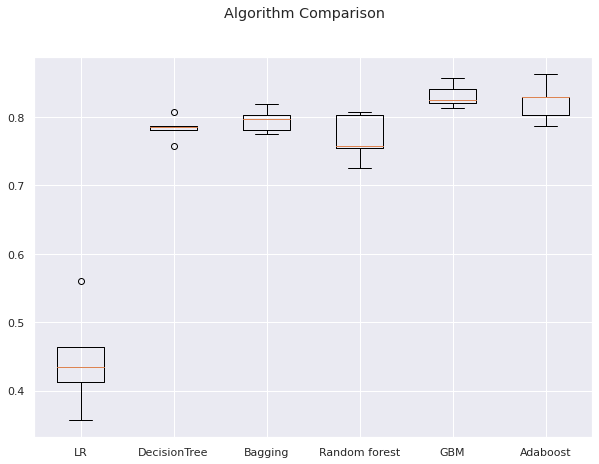

In [ ]:
fig = plt.figure()

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

We can Bagging , Adaboost and GradientBoost are giving better results .

# Model Building using Over Sampling

In [ ]:
sm = SMOTE(sampling_strategy=0.4, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [ ]:
models_Os = []  # Empty list to store all the  Over Sampled models

# Appending models into the list
models_Os.append(("LR",LogisticRegression(random_state=1)))
models_Os.append(("DecisionTree_Os", DecisionTreeClassifier(random_state=1)))
models_Os.append(("Bagging_Os", BaggingClassifier(random_state=1)))
models_Os.append(("Random forest_Os", RandomForestClassifier(random_state=1)))
models_Os.append(("GBM_Os", GradientBoostingClassifier(random_state=1)))
models_Os.append(("Adaboost_Os", AdaBoostClassifier(random_state=1)))


results_Os = []  # Empty list to store all model's CV scores
names_Os = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models_Os:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    results_Os.append(cv_result)
    names_Os.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")
for name, model in models_Os:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

LR: 62.37657134963393
DecisionTree_Os: 88.7530045586407
Bagging_Os: 90.697472026523
Random forest_Os: 91.17087995579499
GBM_Os: 91.59151816549247
Adaboost_Os: 90.5934521342727

Validation Performance:

LR: 56.57894736842105
DecisionTree_Os: 82.89473684210526
Bagging_Os: 84.64912280701753
Random forest_Os: 83.77192982456141
GBM_Os: 90.35087719298247
Adaboost_Os: 88.59649122807018


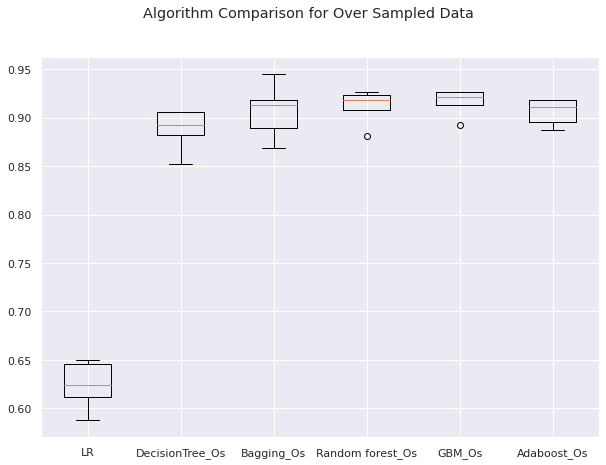

In [ ]:
fig = plt.figure()

fig.suptitle("Algorithm Comparison for Over Sampled Data ")
ax = fig.add_subplot(111)

plt.boxplot(results_Os)
ax.set_xticklabels(names_Os)

plt.show()

We can for over sampled data except Logistic regression all models are giving bettter result with Grandient Boosting as top performer .

# Model Building Using Under Sampling 

In [ ]:
rus = RandomUnderSampler(random_state=1, sampling_strategy = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
models_Us = []  # Empty list to store all Under Sampled  the models

# Appending models into the list
models_Us.append(("LR",LogisticRegression(random_state=1)))
models_Us.append(("DecisionTree_Us", DecisionTreeClassifier(random_state=1)))
models_Us.append(("Bagging_Us", BaggingClassifier(random_state=1)))
models_Us.append(("Random forest_Us", RandomForestClassifier(random_state=1)))
models_Us.append(("GBM_Us", GradientBoostingClassifier(random_state=1)))
models_Us.append(("Adaboost_Us", AdaBoostClassifier(random_state=1)))


results_Us = []  # Empty list to store all model's CV scores
names_Us = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models_Us:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
    )
    results_Us.append(cv_result)
    names_Us.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")
for name, model in models_Us:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

LR: 82.654776917072
DecisionTree_Us: 89.12988650693569
Bagging_Us: 91.10730799255391
Random forest_Us: 93.19221761844713
GBM_Us: 95.2783282291479
Adaboost_Us: 92.97363838347444

Validation Performance:

LR: 82.89473684210526
DecisionTree_Us: 92.98245614035088
Bagging_Us: 92.54385964912281
Random forest_Us: 94.2982456140351
GBM_Us: 95.17543859649122
Adaboost_Us: 93.85964912280701


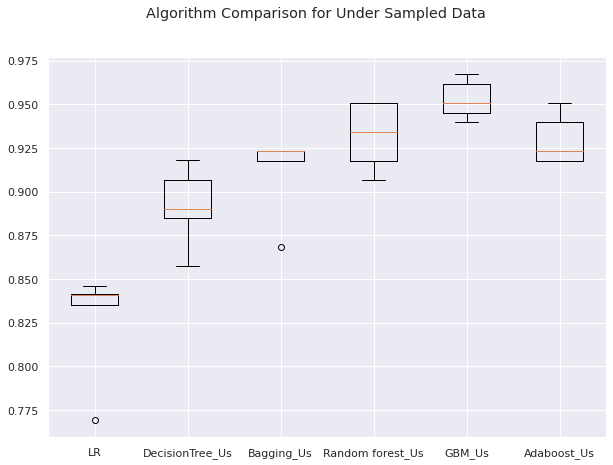

In [ ]:
fig = plt.figure()

fig.suptitle("Algorithm Comparison for Under Sampled Data ")
ax = fig.add_subplot(111)

plt.boxplot(results_Us)
ax.set_xticklabels(names_Us)

plt.show()

For Under sampled data all models are giving better peromance with again Gradient Boosting  giving higest 0.95  followeed by Random Forest and Adaboost .

 Based on Model performance in  simple , under sampled and over sampled data . We can see that Bagging , Grandient Boosting and Ada Boost classifiers are giving good results on  training as well as validation  data . 

 Also we can see that under sampled data is giving much higher score for all these three alogrithms .

# Hyperparameter tuning using random search

# Function  to calculate Accurancy ,Recall , Precision , F1 score for any model

In [ ]:
def model_Performance_Check(model,predictorvariables,target):
  predictions=model.predict(predictorvariables)
  acc = accuracy_score(target, predictions)
  recall=recall_score(target,predictions)
  f1 =f1_score(target,predictions)
  precision=precision_score(target,predictions)

  performance_matric=pd.DataFrame(
     { "Accurancy":acc,
      "Precision":precision,
      "Recall":recall,
      "F1":f1},index=[0],
  )
  
  return performance_matric

#  Function to Plot Confusion Matrix

In [ ]:
def plot_confusion_matrix(model,predictorvariables,target):
   
   y_pred = model.predict(predictorvariables)
   cm = confusion_matrix(target, y_pred)
   labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)
   plt.figure(figsize=(6, 4))
   sns.heatmap(cm, annot=labels, fmt="")
   plt.ylabel("True label")
   plt.xlabel("Predicted label")

# RandomizedSearchCV

# Tuning for Bagging Classifier

In [ ]:
%%time 

# defining model
model = BaggingClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
              'max_samples': [0.8,0.9,1.0], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
   
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 40, 'max_samples': 1.0, 'max_features': 0.8} with CV score=0.9440160931964211:
CPU times: user 1.42 s, sys: 252 ms, total: 1.67 s
Wall time: 41.3 s


 With random search we got list of parameter , we will use these parameter with some changes to find best parameters using Grid Search


In [ ]:
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [1.0], 
              'max_features':[0.8],
              'n_estimators' :[40],
             }


bagging_estimator_tuned.fit(X_train_un, y_train_un)

BaggingClassifier(random_state=1)

In [ ]:
bagged_tuned_performance_train=model_Performance_Check(bagging_estimator_tuned,X_train_un,y_train_un)

In [ ]:
bagged_tuned_performance_train

,Accurancy,Precision,Recall,F1
0,0.994512,0.99779,0.991218,0.994493


In [ ]:
bagged_tuned_performance_val=model_Performance_Check(bagging_estimator_tuned,X_val,y_val)

In [ ]:
bagged_tuned_performance_val

,Accurancy,Precision,Recall,F1
0,0.932299,0.727586,0.925439,0.814672


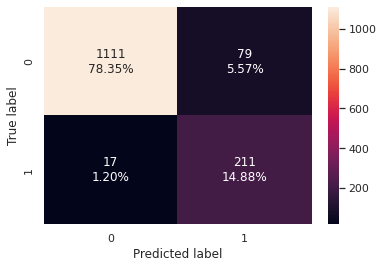

In [ ]:
plot_confusion_matrix(bagging_estimator_tuned,X_val,y_val)

We ca see that for Tuned Bagging Classifier we get similar recall as we got before tuning . Let us check performance of other modesl 

# Tuning Ada boost Classifier

In [ ]:
model=AdaBoostClassifier(random_state=1)
param_grid={
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators":np.arange(10,110,10),
    "learning_rate":np.arange(0.1,1,0.1)
}

scorer=metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=2)} with CV score=0.9516903861166155:


In [ ]:
tunedAdaBoost=AdaBoostClassifier(random_state=1)
param_grid={
    "base_estimator":[DecisionTreeClassifier(max_depth=2)],
    "n_estimators":[100],
    "learning_rate":[0.1]
}
tunedAdaBoost.fit(X_train_un,y_train_un)

AdaBoostClassifier(random_state=1)

In [ ]:
tunedAdaboost_train=model_Performance_Check(tunedAdaBoost,X_train_un,y_train_un)

In [ ]:
tunedAdaboost_train

,Accurancy,Precision,Recall,F1
0,0.945115,0.939328,0.951701,0.945474


In [ ]:
tunedAdaboost_val=model_Performance_Check(tunedAdaBoost,X_val,y_val)

In [ ]:
tunedAdaboost_val

,Accurancy,Precision,Recall,F1
0,0.934415,0.730375,0.938596,0.821497


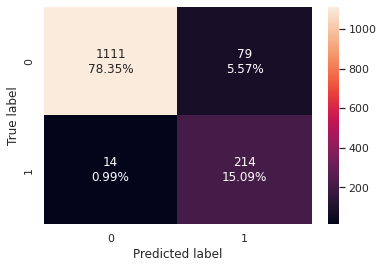

In [ ]:
plot_confusion_matrix(tunedAdaBoost,X_val,y_val)

#  Tuning Gradient Boosting Classifier

In [ ]:
model= GradientBoostingClassifier(random_state=1)
param_grid={
     "n_estimators":[100,150,200,250],
      "subsample":[0.7,0.8,0.9,1],
      "max_features":[0.7,0.8,0.9,1]
  
}

scorer = metrics.make_scorer(metrics.recall_score)
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 250, 'max_features': 0.8} with CV score=0.9604695850597491:


In [ ]:
tunedGB= GradientBoostingClassifier(random_state=1)
param_grid={
     "n_estimators":[200],
      "subsample":[0.8],
      "max_features":[0.9]
  
}

tunedGB.fit(X_train_un,y_train_un)

GradientBoostingClassifier(random_state=1)

In [ ]:
tunedGB_train=model_Performance_Check(tunedGB,X_train_un,y_train_un)

In [ ]:
tunedGB_train

,Accurancy,Precision,Recall,F1
0,0.9764,0.970716,0.982437,0.976541


In [ ]:
tunedGB_val=model_Performance_Check(tunedGB,X_val,y_val)

In [ ]:
tunedGB_val

,Accurancy,Precision,Recall,F1
0,0.944993,0.764085,0.951754,0.847656


# Model Performance comparision and best model selection

In [ ]:
mf_comparision_trainingData=pd.concat([bagged_tuned_performance_train.T,tunedAdaboost_train.T,tunedGB_train.T] ,axis=1)
mf_comparision_trainingData.columns=['TunedBagging','TunedAdaBoost','TunedGB']


In [ ]:
mf_comparision_trainingData

,TunedBagging,TunedAdaBoost,TunedGB
Accurancy,0.994512,0.945115,0.976400
Precision,0.997790,0.939328,0.970716
Recall,0.991218,0.951701,0.982437
F1,0.994493,0.945474,0.976541


In [ ]:
mf_comparision_valData=pd.concat([bagged_tuned_performance_val.T,tunedAdaboost_val.T,tunedGB_val.T] ,axis=1)
mf_comparision_valData.columns=['TunedBagging','TunedAdaBoost','TunedGB']


In [ ]:
mf_comparision_valData

,TunedBagging,TunedAdaBoost,TunedGB
Accurancy,0.932299,0.934415,0.944993
Precision,0.727586,0.730375,0.764085
Recall,0.925439,0.938596,0.951754
F1,0.814672,0.821497,0.847656


 Looking at the Performance  of all three tuned models on training and validation we can see that TuneGB( Tuned Grandient Boost ) model is giving recall of 0.95 and overall F1 score of 0.84 .Hence we should should this model as our final model . 

 Let us check  Feature importance for our final model.
 

# Feature Importance 

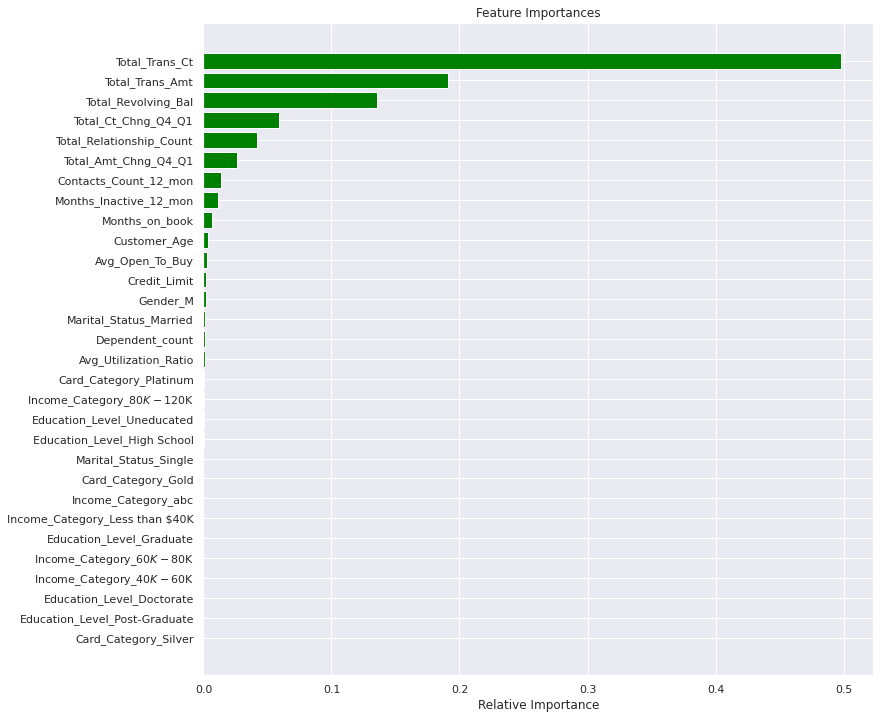

In [ ]:
feature_names = X_train_un.columns
importances = tunedGB.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Looking at feature importance we can see that Total transaction count ,total _transaction_aount , total_revolving balance  play importance role in customer's relationship ( attring or existing ) with Bank . Which is quiet understadnable as people who are doing more transactions in terms of count and money tend to stay with bank .


## Pipelines for productionizing the model

Now, we have a final model. let's create pipelines to put the model into production
#Column Transformer
 
Column transformer will allow different columns  of the data set  to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space.

For categorical columns, Education Level and Maritial Status , we will do missing value imputation and  one hot encoding  and add these pipe line steps in preprocessing .



In [ ]:
categorical_features = ['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

numerical_features = ["Customer_Age", "Dependent_count", "Months_on_book",
           "Total_Relationship_Count"  
           , "Months_Inactive_12_mon"      
 ,  "Contacts_Count_12_mon"      
 ,  "Total_Revolving_Bal"       
 ,"Avg_Open_To_Buy"           
 ,"Total_Amt_Chng_Q4_Q1"      
 ,"Total_Trans_Amt"           
 ,"Total_Trans_Ct"            
 ,"Total_Ct_Chng_Q4_Q1"       
 ,"Avg_Utilization_Ratio" ]

numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])

categorical_transformer = Pipeline(
    steps=[
        ("imputer_cat", SimpleImputer(strategy="most_frequent")),
        ("encoding_onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
 
preprocessor = ColumnTransformer(
    transformers=[
         ("num", numeric_transformer, numerical_features),
       ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)


In [ ]:
X = data.drop(["Attrition_Flag"], axis=1)
y = data["Attrition_Flag"]


As we have found our best model so we will not split data in three part but we will just split it in train and test 

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)


rus = RandomUnderSampler(random_state=1, sampling_strategy = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


In [ ]:
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "tunedGB",
            GradientBoostingClassifier(
            random_state=1,
            n_estimators=200,
            subsample=0.8,
            max_features =0.9,
            ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train_un, y_train_un)


Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Amt_Chng_Q4_Q1',
                    

#  Insight and Recommandation



 We have analzed  customer data for Thera bank . We observed their transaction pattern  usage history and other paramters like income , education level , depedant etc . Based on Analysis we found that 

1.   Customer we have more revoling balance and who does more transactions 
  in terms of  count as as well as money are going to stay with Bank but the costomer  who are doing less transaction in last quarter are more likely to make a decision to stop using  .
2.  Also it is observed that income category does not play much role in person staying or leaving the Bank 
3. Customer  with Months on the book value higher are tend to stay with Bank as compared to Lower value 
4.   Bank should  put more efforts in tracking , understanding and address  issues of customer who have not done  much transactions in last quarter .
5. Also Bank should check  for customer  with sudden drop in trnsaction amount .





